<a href="https://colab.research.google.com/github/sidharth-ds/Attrition-Churn-prediction-project/blob/main/Attrition_Churn_prediction_telecom_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Churn/Attrition is defined in business terms as ‘when a client cancels a subscription to a service they have been using.’ 
* A common example is people cancelling Spotify/Netflix subscriptions. 
* So, Churn Prediction is essentially predicting which clients are most likely to cancel a subscription i.e ‘leave a company’ based on their usage of the service.
* Acquiring new customers is often arduous and costlier than retaining old ones. Hence, the insights gained from Churn Prediction helps them to focus more on the customers that are at a high risk of leaving.

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

In [159]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* As we can see there are a total of 20 columns in our data set. 
* Out of these, only 3 are of numeric data type.

### Visualization

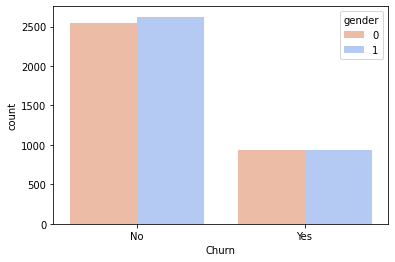

In [187]:
sns.countplot(x='Churn',data=df,hue='gender',palette="coolwarm_r")

From the above graph, we can see that gender is not a contributing factor for customer churn in this data set as the numbers of both the genders, that have or haven’t churned, are almost the same.

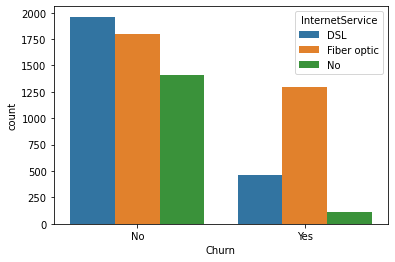

In [162]:
sns.countplot(x='Churn',data=df, hue='InternetService')

We can see that people using Fiber-optic services have a higher churn percentage. This shows that the company needs to improve their Fiber-optic service.

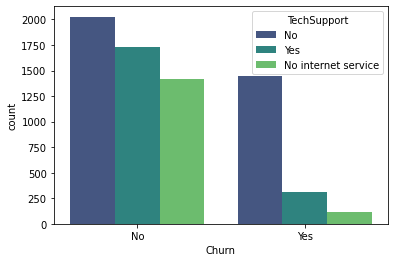

In [188]:
sns.countplot(x='Churn',data=df, hue='TechSupport',palette='viridis')

Those customers who don’t have tech support have churned more, which is
pretty self-explanatory. This also highlights the fact that the tech
support provided by the company is up to the mark.

### Tackling numeric data

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Tenure (in Months)')]

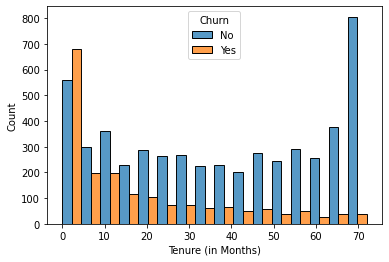

In [189]:
ax = sns.histplot(x = 'tenure', hue = 'Churn', data = df, multiple='dodge')
ax.set(xlabel="Tenure (in Months)", ylabel = "Count")

The churn amount is higher in the initial 5 months, which is usually the
time when the new customers try out the service and decide whether to
continue or cancel. This pretty much can be attributed to the
uncertainty in the customer’s mind.

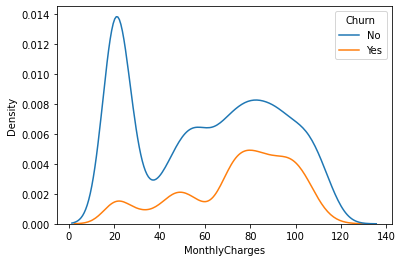

In [191]:
sns.kdeplot(x='MonthlyCharges',hue='Churn',data=df)

We cannot see a definite pattern in this, but we can conclude that those who have monthly charges as high as 100 dollars have chosen not to churn. This indicates that the company has done well to retain high paying customers.

In [166]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Encoding:
Machine Learning models do not work well with categorical inputs. So, we convert the categorical variables in our data set to numerical values by using one-hot encoding.

In [167]:
df["gender"] = df["gender"].map({"Male": 1, "Female": 0})

df["Partner"] = df["Partner"].map({"Yes": 1, "No": 0})

df["PhoneService"] = df["PhoneService"].map({"Yes": 1, "No": 0})

df["PaperlessBilling"] = df["PaperlessBilling"].map({"Yes": 1, "No": 0})

df["Dependents"] = df["Dependents"].map({"Yes": 1, "No": 0})

In [168]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,No
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,Yes


In [169]:
df_oh = df[["MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]]

In [170]:
df_oh = pd.get_dummies(df_oh)
df_oh

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0,0,0,0,1,1,...,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
7040,0,1,0,1,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,1,0
7041,0,0,1,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1


In [171]:
df1 = df.join(df_oh)

In [172]:
df1 = df1.drop(["customerID","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"],axis=1)
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,No,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.5,No,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,Yes,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,No,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,Yes,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.5,No,...,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,7362.9,No,...,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,No,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,306.6,Yes,...,1,0,0,1,0,0,0,0,0,1


In [173]:
df1["TotalCharges"] = [float(str(i).replace(" ", "0")) for i in df["TotalCharges"]]

In [174]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                       object
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No                            uint8
OnlineSecurity_No internet service           uint8
OnlineSecurity_Yes                           uint8
OnlineBackup_No                

### splitting

In [175]:
X = df1.drop('Churn',axis=1) 
X = X.values

In [176]:
df1['Churn'] = df1['Churn'].map({"Yes":1,"No":0})

In [179]:
y = df1['Churn'].values

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [181]:
from sklearn.linear_model import LogisticRegression 
logreg=LogisticRegression()

logreg.fit(X_train,y_train)

prediction_logreg=logreg.predict(X_test)

print(accuracy_score(y_test,prediction_logreg))

0.8176011355571328


### XGBoost

In [182]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)

prediction_xgb = xgb_model.predict(X_test)

print(accuracy_score(y_test, prediction_xgb))

0.8090844570617459


* Logistic Regression gives the best accuracy of 0.81
